# Titanic Survival Prediction

In [1]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 41.6MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path ,
    index_col ='PassengerId'
)

In [4]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [5]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [6]:
X

array([[ 3.    ,  0.    , 22.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    , 38.    , ..., 71.2833,  1.    ,  1.    ],
       [ 3.    ,  1.    , 26.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 3.    ,  1.    , 28.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  0.    , 26.    , ..., 30.    ,  1.    ,  0.    ],
       [ 3.    ,  0.    , 32.    , ...,  7.75  ,  2.    ,  0.    ]])

In [7]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate(
    (intercept, X),
    axis = 1
)

In [9]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

In [12]:
def compute_loss (y_hat , y):
    y_hat = np.clip(
        y_hat, 1e-7, 1 - 1e-7
    )
    return (
        -y*np.log(y_hat)\
        -(1 - y)*np.log(1 - y_hat)
    ).mean ()

In [13]:
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

In [14]:
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

In [15]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [16]:
lr = 0.01
epochs = 100
batch_size = 16
np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

In [17]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss : {train_batch_loss:.3f}\tValidation loss : {val_batch_loss:.3f}')


EPOCH 1:	Training loss : 1.691	Validation loss : 1.697

EPOCH 2:	Training loss : 1.330	Validation loss : 1.432

EPOCH 3:	Training loss : 1.325	Validation loss : 1.435

EPOCH 4:	Training loss : 1.314	Validation loss : 1.435

EPOCH 5:	Training loss : 1.302	Validation loss : 1.434

EPOCH 6:	Training loss : 1.284	Validation loss : 1.434

EPOCH 7:	Training loss : 1.151	Validation loss : 1.369

EPOCH 8:	Training loss : 1.100	Validation loss : 1.330

EPOCH 9:	Training loss : 1.211	Validation loss : 1.450

EPOCH 10:	Training loss : 1.323	Validation loss : 1.508

EPOCH 11:	Training loss : 1.336	Validation loss : 1.536

EPOCH 12:	Training loss : 1.212	Validation loss : 1.434

EPOCH 13:	Training loss : 1.015	Validation loss : 1.267

EPOCH 14:	Training loss : 1.218	Validation loss : 1.470

EPOCH 15:	Training loss : 1.214	Validation loss : 1.468

EPOCH 16:	Training loss : 1.211	Validation loss : 1.466

EPOCH 17:	Training loss : 1.207	Validation loss : 1.463

EPOCH 18:	Training loss : 1.203	Validat

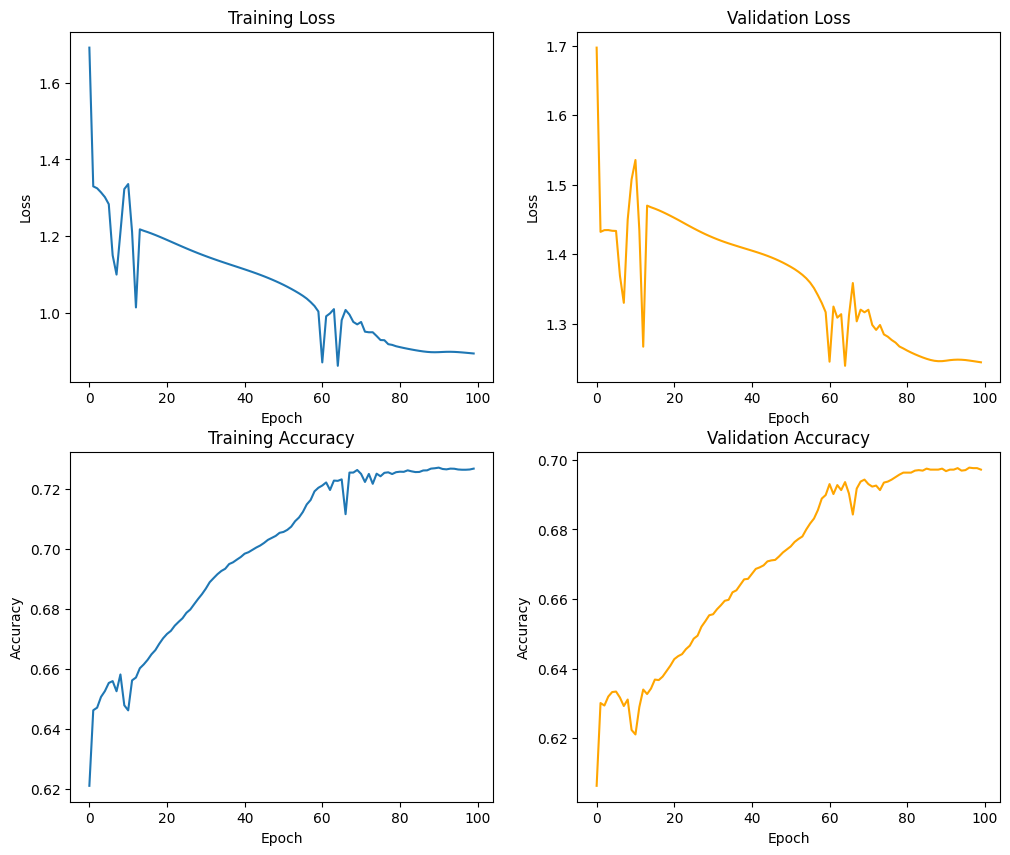

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs , 'orange')
ax[1, 1].set( xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.show()

In [19]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set :')
print(f'Accuracy : {val_set_acc}')
print(f'Accuracy : {test_set_acc}')

Evaluation on validation and test set :
Accuracy : 0.776536312849162
Accuracy : 0.7865168539325843


# Twitter Sentiment Analysis

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [3]:
!gdown 1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK

Downloading...
From: https://drive.google.com/uc?id=1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK
To: /content/sentiment_analysis.csv
100% 1.10M/1.10M [00:00<00:00, 33.0MB/s]


In [4]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(
    dataset_path,
    index_col = 'id'
)

In [5]:
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


In [6]:
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case = False,
        strip_handles = True,
        reduce_len = True
    )
    text_tokens = tokenizer.tokenize(text)
    return text_tokens

In [7]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

In [8]:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

In [9]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']
    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [10]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [11]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
    y_hat = np.clip(
        y_hat, 1e-7, 1 - 1e-7
    )
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(
        X.T, (y_hat - y)
    ) / y. size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [14]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

In [15]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss : {train_batch_loss:.3f}\tValidation loss : {val_batch_loss:.3f}')


EPOCH 1:	Training loss : 0.707	Validation loss : 0.704

EPOCH 2:	Training loss : 0.661	Validation loss : 0.659

EPOCH 3:	Training loss : 0.624	Validation loss : 0.622

EPOCH 4:	Training loss : 0.594	Validation loss : 0.591

EPOCH 5:	Training loss : 0.569	Validation loss : 0.566

EPOCH 6:	Training loss : 0.548	Validation loss : 0.546

EPOCH 7:	Training loss : 0.531	Validation loss : 0.528

EPOCH 8:	Training loss : 0.516	Validation loss : 0.514

EPOCH 9:	Training loss : 0.504	Validation loss : 0.502

EPOCH 10:	Training loss : 0.494	Validation loss : 0.491

EPOCH 11:	Training loss : 0.485	Validation loss : 0.483

EPOCH 12:	Training loss : 0.477	Validation loss : 0.475

EPOCH 13:	Training loss : 0.471	Validation loss : 0.468

EPOCH 14:	Training loss : 0.465	Validation loss : 0.463

EPOCH 15:	Training loss : 0.460	Validation loss : 0.457

EPOCH 16:	Training loss : 0.456	Validation loss : 0.453

EPOCH 17:	Training loss : 0.452	Validation loss : 0.449

EPOCH 18:	Training loss : 0.448	Validat

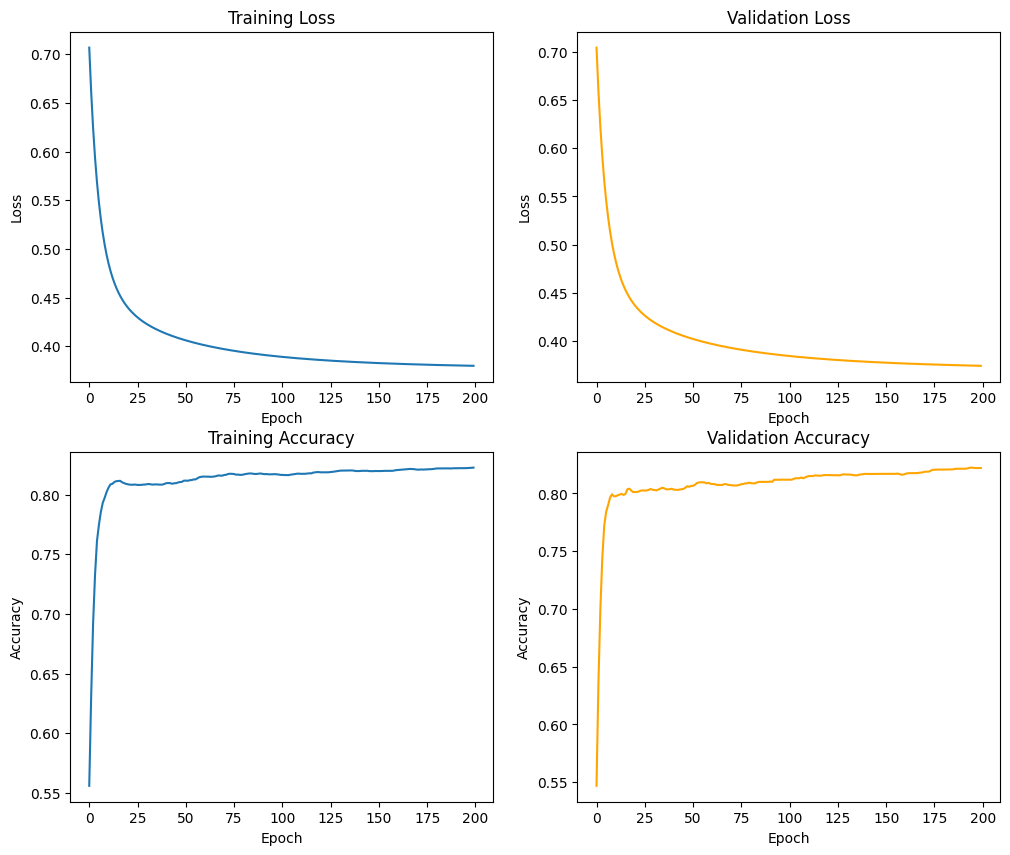

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs , 'orange')
ax[1, 1].set( xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.show()

In [17]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set :')
print(f'Accuracy : {val_set_acc}')
print(f'Accuracy : {test_set_acc}')

Evaluation on validation and test set :
Accuracy : 0.821969696969697
Accuracy : 0.8434343434343434
